In [3]:
#Loding the dataset
import pandas as pd
file_path=r"D:\DS\EDA2\adult_with_headers.csv"
df = pd.read_csv(file_path)

df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#statistics summary
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#missing values and handling them
df.info()
df.isnull().sum()
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
#Applying scaling techniques to numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#identifying numerical features
numerical_features= df_cleaned.select_dtypes(include=['int64','float64']).columns

#Standard scaling
standard_scaler = StandardScaler()
df_standard_scaled= df_cleaned.copy()
df_standard_scaled[numerical_features]= standard_scaler.fit_transform(df_standard_scaled[numerical_features])

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df_cleaned.copy()
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df_min_max_scaled[numerical_features])

print(df_standard_scaled.head())
print(df_min_max_scaled.head())

        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0      0.148453      -0.21

In [27]:
#Encoding techniques
#applying one-hot encoding and Label Encoding
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

#one-hot encoding for categorical variables with less than 5 categories
one_hot_encoded_features = [col for col in categorical_features if df_cleaned[col].nunique() < 5]
df_one_hot_encoded = pd.get_dummies(df_cleaned, columns=one_hot_encoded_features)

#Label Encoding for categorical variables with more than 5 categories
from sklearn.preprocessing import LabelEncoder

label_encoded_features = [col for col in categorical_features if df_cleaned[col].nunique() >=5]
df_label_encoded = df_cleaned.copy()
label_encoders = {col: LabelEncoder() for col in label_encoded_features}
for col, le in label_encoders.items():
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

print(df_one_hot_encoded.head())
print(df_label_encoded.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Female  \
0          2174             0              40   United-States        False   
1             0             0         

In [28]:
#Feature Engineering
# Example new features
df_cleaned['age_bucket'] = pd.cut(df_cleaned['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])
df_cleaned['hours_per_week_bucket'] = pd.cut(df_cleaned['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

print(df_cleaned[['age', 'age_bucket', 'hours_per_week', 'hours_per_week_bucket']].head())


   age   age_bucket  hours_per_week hours_per_week_bucket
0   39  Middle-aged              40             Full-time
1   50  Middle-aged              13             Part-time
2   38  Middle-aged              40             Full-time
3   53       Senior              40             Full-time
4   28        Young              40             Full-time


capital_loss      4.594629
capital_gain      3.028219
fnlwgt            1.446980
age               0.558743
hours_per_week    0.227643
education_num    -0.311676
dtype: float64


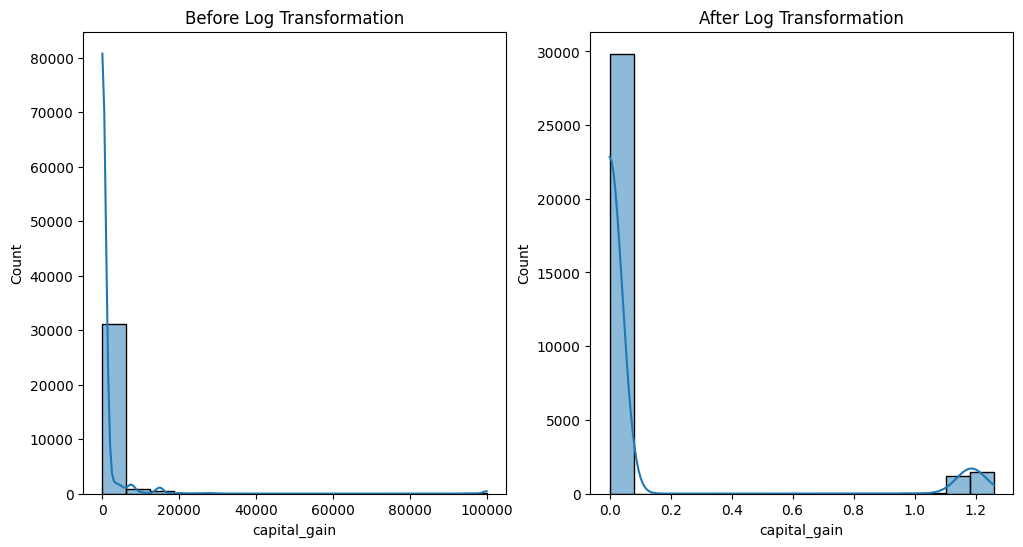

In [34]:
#applying transformation to skewed numerical feature
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

#checking skewness of numerical features
skewed_features = df_cleaned[numerical_features].skew().sort_values(ascending=False)
print(skewed_features)

#applying log transformation to a skewed feature
skewed_feature = 'capital_gain'
df_cleaned[skewed_feature] = np.log1p(df_cleaned[skewed_feature])

#plot distribution before and after transformation
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['capital_gain'],ax=ax[0], kde=True)
sns.histplot(df_cleaned[skewed_feature], ax=ax[1],kde=True)
ax[0].set_title('Before Log Transformation')
ax[1].set_title('After Log Transformation')
plt.show()

In [36]:
from sklearn.ensemble import IsolationForest

iso_forest=IsolationForest(contamination=0.05)
outliers= iso_forest.fit_predict(df_cleaned[numerical_features])
df_no_outliers= df_cleaned[outliers == 1]

print(f"Number of outliers removed: {len(df_cleaned)- len(df_no_outliers)}")

Number of outliers removed: 1628


In [ ]:
#Ap[lying PPS analysis
!pip install ppscore
import ppscore as pps

pps_matrix = pps.matrix(df_no_outliers)
pps_matrix = pps_matrix[pps_matrix['ppscoree']>0]

print(pps_matix.head())

#comparing with corelation matrix
correlation_matrix = df_no_outliers.corr()
print(correlation_matrix)